In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [4]:
df = pd.read_csv('Stock_Price.csv')
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [5]:
df.shape

(5734, 1285)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734 entries, 0 to 5733
Columns: 1285 entries, date to TARGET
dtypes: float64(1281), int64(2), object(2)
memory usage: 56.2+ MB


In [7]:
df.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5.734000e+03,5389.000000,5389.000000,5159.000000,5159.000000,...,5411.000000,5326.000000,5274.000000,5326.000000,5274.000000,5274.000000,5518.000000,5623.000000,5623.000000,5733.000000
mean,41.345915,42.118841,40.541320,41.322744,40.885837,9.726012e+05,47.466589,49.836721,47.734684,49.926277,...,44.783895,30.271910,30.272746,30.271910,30.272746,0.171833,inf,-0.266519,-3.704509,0.194139
std,115.365929,117.221869,113.326538,115.307632,113.915254,4.513014e+06,12.295206,5.090302,9.202989,3.437471,...,124.066232,58.114719,56.815961,58.114719,56.815961,13.330258,NaN,8.481020,312.277613,0.395571
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-633.603617,-471.268259,-633.603617,-471.268259,-162.335358,0.000000,-90.538818,-23399.465955,0.000000
25%,4.030000,4.100000,3.980000,4.020000,3.929585,2.302500e+04,38.991657,47.108881,41.374197,48.220938,...,4.510000,10.000223,11.854846,10.000223,11.854846,-6.553304,0.659939,-0.420754,-4.552263,0.000000
50%,9.950000,10.005000,9.880000,9.940000,9.930000,1.671500e+05,47.109876,48.364221,47.411041,48.979553,...,10.240000,34.105160,34.210852,34.105160,34.210852,0.000000,1.000000,-0.014000,-0.221242,0.000000
75%,23.900000,24.000000,23.850000,23.984500,22.661654,9.322750e+05,55.179486,50.973703,53.730652,50.587951,...,24.480000,65.255619,64.235991,65.255619,64.235991,6.683785,1.589606,0.250000,3.083666,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,154.374327,inf,120.256775,250.318539,1.000000


In [8]:
df.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    460
volumenrelativo     216
diff                111
INCREMENTO          111
TARGET                1
Length: 1285, dtype: int64

In [9]:
data_new = df[['date','open', 'high', 'low', 'close', 'volume']]
data_new

,date,open,high,low,close,volume
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,106600
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,128700
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,103100
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,173600
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,137800
...,...,...,...,...,...,...
5729,2022-10-28,33.110001,34.855000,33.110001,34.459999,122000
5730,2022-10-31,37.169998,40.259998,36.102001,38.349998,390500
5731,2022-11-01,38.990002,38.990002,37.459999,38.080002,173700
5732,2022-11-02,38.000000,40.930000,37.889999,39.880001,250400


In [10]:
data_new.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [11]:
data_new.duplicated().sum().any()

False

In [12]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734 entries, 0 to 5733
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5734 non-null   object 
 1   open    5734 non-null   float64
 2   high    5734 non-null   float64
 3   low     5734 non-null   float64
 4   close   5734 non-null   float64
 5   volume  5734 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 268.9+ KB


In [13]:
data_new.describe()

,open,high,low,close,volume
count,5734.000000,5734.000000,5734.000000,5734.000000,5.734000e+03
mean,41.345915,42.118841,40.541320,41.322744,9.726012e+05
std,115.365929,117.221869,113.326538,115.307632,4.513014e+06
min,0.410000,0.435000,0.405000,0.408000,0.000000e+00
25%,4.030000,4.100000,3.980000,4.020000,2.302500e+04
50%,9.950000,10.005000,9.880000,9.940000,1.671500e+05
75%,23.900000,24.000000,23.850000,23.984500,9.322750e+05
max,795.739990,799.359985,784.960022,797.489990,1.615550e+08


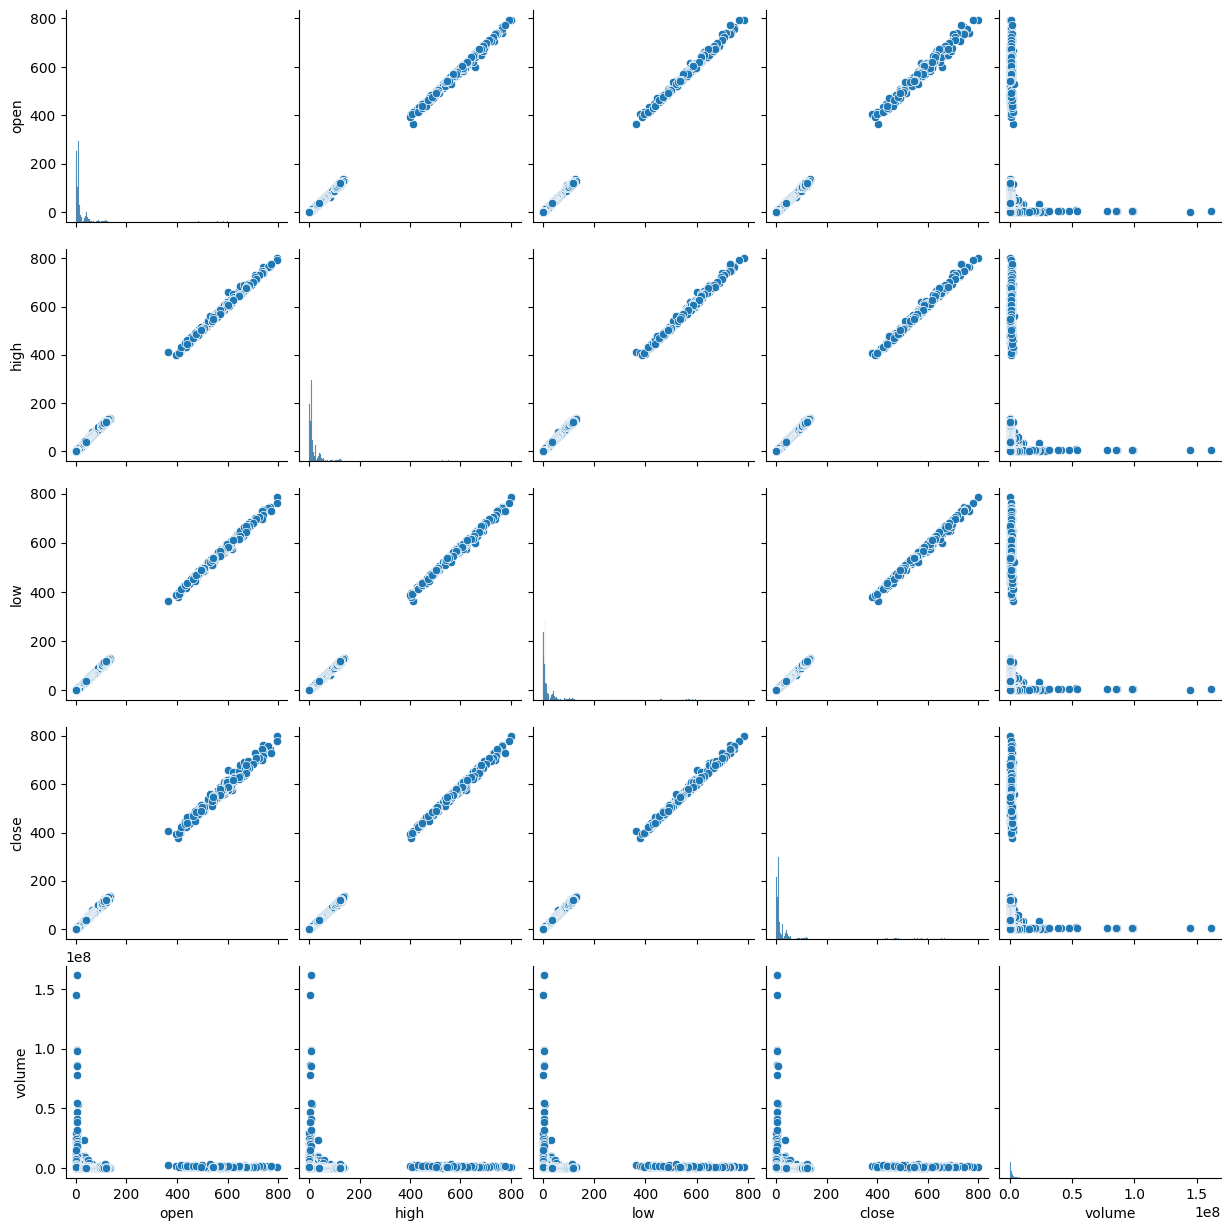

In [14]:
sns.pairplot(data_new)


<Axes: >

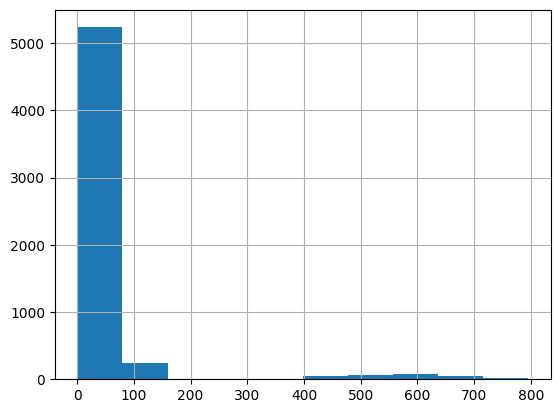

In [15]:
data_new['open'].hist()

<Axes: >

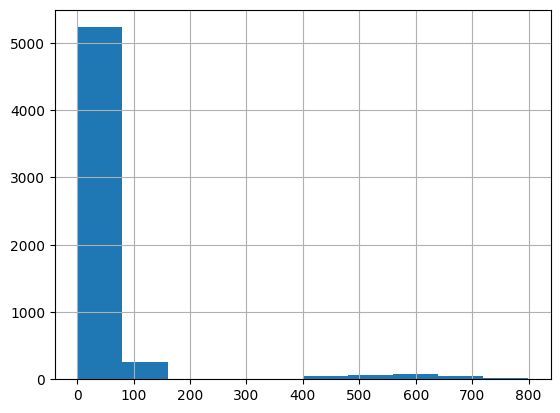

In [16]:
data_new['high'].hist()

<Axes: >

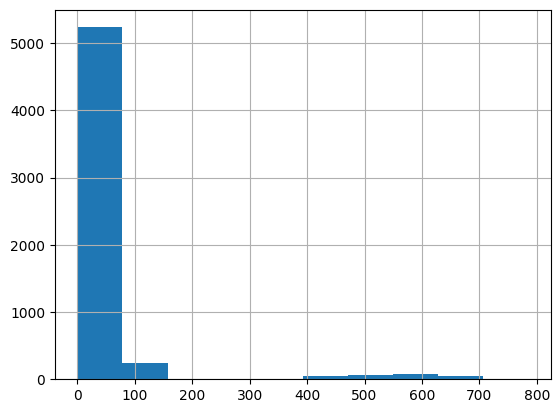

In [17]:
data_new['low'].hist()

<Axes: >

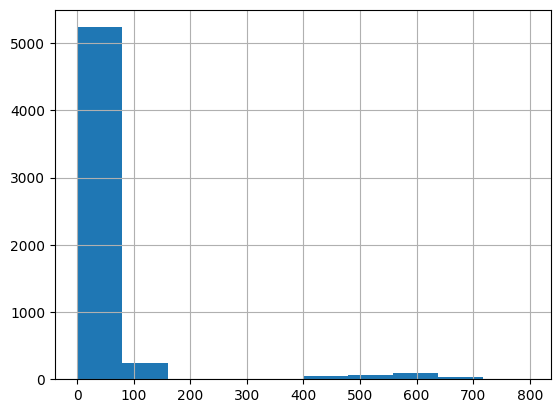

In [18]:
data_new['close'].hist()

<Axes: >

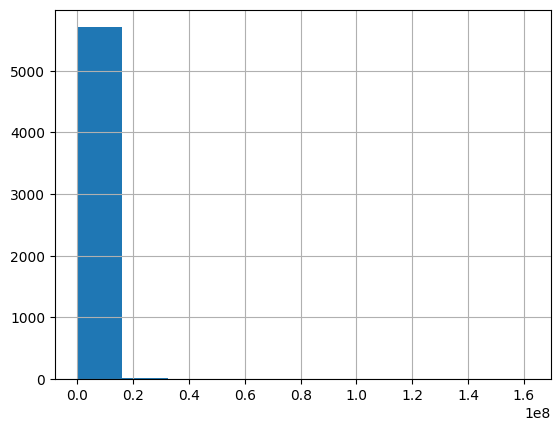

In [19]:
data_new['volume'].hist()

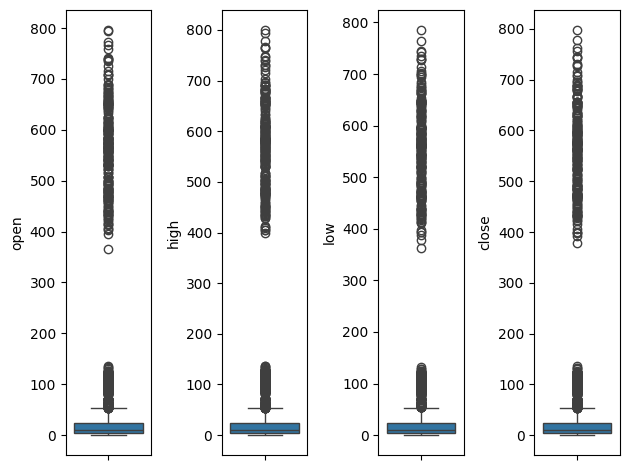

In [20]:
f, axes = plt.subplots(1,4)
sns.boxplot(y = 'open', data = data_new, ax = axes[0])
sns.boxplot(y = 'high', data = data_new, ax = axes[1])
sns.boxplot(y = 'low', data = data_new, ax = axes[2])
sns.boxplot(y = 'close', data = data_new, ax = axes[3])
plt.tight_layout()


In [21]:
import plotly.graph_objects as go
figure = go.Figure(data = [go.Candlestick(x=data_new["date"],
                                          open=data_new["open"], high=data_new["high"],
                                          low=data_new["low"], close=data_new["close"])])
figure.update_layout(title = "Stock price Analysis", xaxis_rangeslider_visible = False)
figure.show()

In [22]:
X = data_new[['open', 'high', 'low', 'volume']].values
y = data_new['close'].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
print('Train', X_train.shape)
print('Test', X_test.shape)

Train (4587, 4)
Test (1147, 4)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

regressor = LinearRegression()

model = regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [26]:
predicted = regressor.predict(X_test)

In [27]:
predicted.shape

(1147,)

In [28]:
print("Model Coefficients:", regressor.coef_)
print("Model intercept:", regressor.intercept_)

Model Coefficients: [-8.17919298e-01  9.24521097e-01  8.94231440e-01 -4.10116940e-10]
Model intercept: -0.04288507922200324


In [29]:
dframe = pd.DataFrame(y_test, predicted)
dfr = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': predicted})
print(dfr)

      Actual_Price  Predicted_Price
0             9.82         9.844627
1            24.85        24.827821
2            14.82        14.935780
3            14.10        13.886346
4             1.55         1.525932
...            ...              ...
1142          9.43         9.352476
1143         14.63        14.392643
1144         11.18        10.872937
1145         22.50        22.315598
1146          2.13         2.033929

[1147 rows x 2 columns]


In [30]:
dfr.describe()

,Actual_Price,Predicted_Price
count,1147.000000,1147.000000
mean,41.105887,41.153030
std,115.993453,116.295304
min,0.434000,0.398588
25%,4.112500,4.094788
50%,9.900000,9.875370
75%,20.850000,20.415179
max,715.229980,717.684582


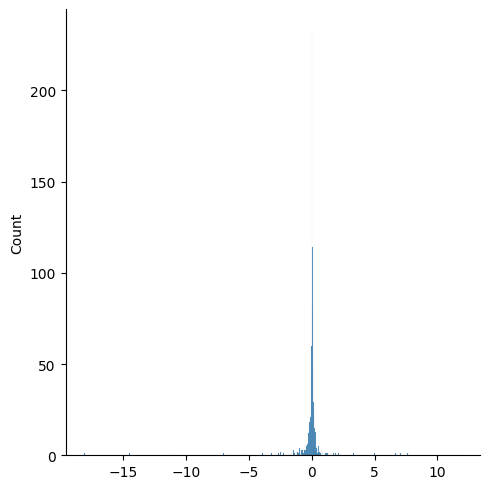

In [31]:
residual = y_test - predicted
sns.displot(residual)

In [32]:
#Checking p-value with right tailed or upper tailed test

import scipy.stats
p_value = scipy.stats.norm.sf(abs(1.67))
print('p value is:' + str(p_value))

p value is:0.04745968180294733


In [33]:
#Printing the OLS Regression Results model
results3 = sm.OLS(y_test, X_test).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.792e+06
Date:                Wed, 29 May 2024   Prob (F-statistic):                        0.00
Time:                        18:36:11   Log-Likelihood:                         -1878.4
No. Observations:                1147   AIC:                                      3765.
Df Residuals:                    1143   BIC:                                      3785.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5570      0.025    -22.632      0.000      -0.605      -0.509
x2             0.7308      0.024     30.319      0.000       0.684       0.778
x3             0.8261      0.027     30.943      0.000       0.774       0.879
x4          2.417e-09   1.03e-08      0.236      0.814   -1.77e-08    2.25e-08
==============================================================================
Omnibus:                      401.562   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106827.342
Skew:                          -0.137   Prob(JB):                         0.00
Kurtosis:                      50.278   Cond. No.                     3.18e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

regression_confidence = regressor.score(X_test, y_test)
print("Linear regression confidence: "), regression_confidence

Linear regression confidence: 


(None, 0.9998649393517496)

In [35]:
import math

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error:  0.38298424801284064
Mean Squared Error:  1.8155866574750799
Root Mean Squared Error:  1.347437069949866


In [36]:
x2 = abs(predicted - y_test)
y2 = 100 * (x2 / y_test)
accuracy = 100 - np.mean(y2)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  98.51 %.


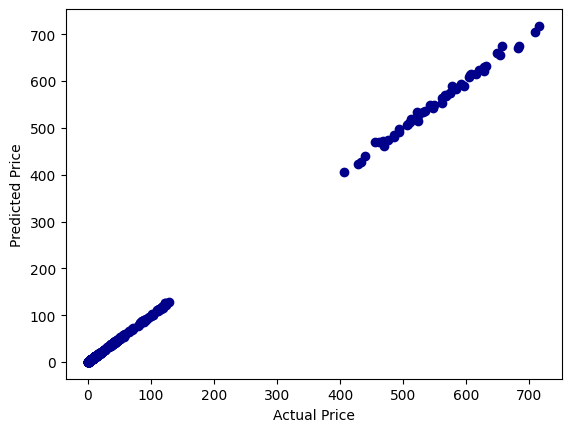

In [37]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price, color = 'Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

<Axes: >

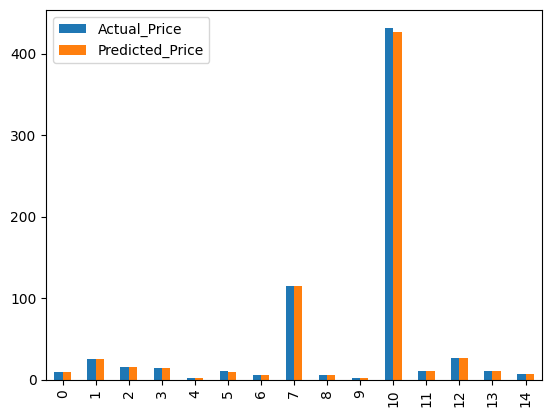

In [38]:
graph = dfr.head(15)
graph.plot(kind = 'bar')